#### Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

#### Data Source
This dataset has around 49,000 observations in it with 16 columns.

#### Acquaring and Loading Data
Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

## Airbnb
Airbnb provides various rental options for different customer segments. Based on customer budget, they can either opt for an entire house or just a room or even better share a room. With a range of prices as low as 700 to as high as 50,000, comes a range of amenities, such as selection on a number of beds, bedrooms, kitchen, air conditioning, heating washing machine, breakfast, beachfront, gym, pool etc to name a few.

#### There are three major types of places:

Entire Home/appartment 
Private room
Shared room

#### For the hosts, Airbnb has a superhost program providing exclusive benefits and higher visibility.

Hosts also have to comply with certain state/municipality rules and regulations to be listed on Airbnb. These rules are promulgated keeping in mind the safety of the residents living in the residential blocks, to prevent malpractices by individuals or a group. Airbnb has to comply with these rules as well to be able to operate in that city. 

For Seattle, some of the rules are given below.

Short-term rental license.
Bed and breakfast operator’s license.
License to host more than 2 listings.
List of all Seattle local laws.

In [1]:
#Importing necessery libraries for future analysis of the dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
#Using pandas library and 'read_csv' function to read csv file

df=pd.read_csv('./AB_NYC_2019.csv')

In [3]:
df.head()

,id,name_,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,$149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,$225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,$150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,$89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,$80,10,9,19-11-2018,0.10,1,0


### Understanding, Wrangling and Cleaning Data

In [4]:
#After looking at the head of the dataset we already are able to notice some NaN values, 
#therefore need to examine missing values further before continuing with analysis

In [5]:
#But let's first check the amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [6]:
#Checking type of every column in the dataset
df.dtypes

id                                  int64
name_                              object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#Looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset

df.isnull().sum()

id                                    0
name_                                16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### The name column has some null values.

In [8]:
df['name_'].isnull().nlargest(20)

2854      True
3703      True
5775      True
5975      True
6269      True
6567      True
6605      True
8841      True
11963     True
12824     True
13059     True
13401     True
15819     True
16071     True
18047     True
28889     True
0        False
1        False
2        False
3        False
Name: name_, dtype: bool

* Below is the Full detail of the missing values in names column 

In [9]:
#df[df['name_'].isnull()]

In [10]:
#setting indexes of the null values equal to drop1
drop1 = df.loc[df['name_'].isnull()].index
drop1

Int64Index([ 2854,  3703,  5775,  5975,  6269,  6567,  6605,  8841, 11963,
            12824, 13059, 13401, 15819, 16071, 18047, 28889],
           dtype='int64')

In [11]:
df.isnull().sum()

id                                    0
name_                                16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.drop(drop1, axis=0, inplace = True)

#df.drop ([2854,3703, 5775, 5975, 6269, 6567, 6605,8841,11963,12824,13059,13401,15819,16071,18047,28889], axis=0, inplace= True)

In [13]:
df.isnull().sum()

id                                    0
name_                                 0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
df['host_name'].isnull().nlargest(22)

360       True
2700      True
5745      True
6075      True
6582      True
8163      True
8257      True
8852      True
9138      True
9817      True
14040     True
14631     True
15174     True
19565     True
27777     True
27962     True
28042     True
28274     True
30570     True
32193     True
38992     True
0        False
Name: host_name, dtype: bool

In [15]:
df[df['host_name'].isnull()]

# ctrl+f  32722063 ctrl+v  and notice that the host id is same and host name is missing couple of times other than that
# all the values are showing up 
# host id 159156636 occurring  3 times with nan value for host name 

,id,name_,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,$50,1,43,08-07-2019,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,$100,30,49,02-01-2017,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,$86,3,34,23-05-2019,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,$50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,$195,1,1,20-10-2015,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,$85,2,182,19-06-2019,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,$37,1,1,01-07-2015,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,$100,2,157,19-06-2019,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,$145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,$28,1,1,01-08-2015,0.02,1,0


* Writing host name for host id 159156636 instead of dropping it, because all the other values are present moreover the ratings are quite good for the ID as well.
* Let's name the host as  'ModHost1'

In [16]:
# at location 1,2,3 make host name = ModHost1
df.loc[[27962, 28042, 28274], 'host_name'] = 'ModHost1'  # loc[indexes of the nan values in host_name column]

In [17]:
# let's see the changes reflcting in the dataset
df[df['host_name']=='ModHost1']

,id,name_,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
27962,21867710,Amazing room in the centre on Manhatten! Welcome!,159156636,ModHost1,Manhattan,Hell's Kitchen,40.75668,-73.99097,Private room,$120,1,89,01-01-2019,5.16,3,0
28042,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,ModHost1,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,$120,1,109,01-01-2019,5.97,3,0
28274,21990808,***SLEEPING IN THE GOLDEN PLACE***,159156636,ModHost1,Manhattan,Hell's Kitchen,40.75835,-73.99065,Private room,$120,1,88,14-12-2018,4.93,3,0


* Writing host name for host id 32722063 instead of dropping it, because all the other values are present moreover the ratings are quite good for the ID as well.
 
* Let's name the host as ModHost2   > because of it occurring at two places

In [18]:
df.loc[[8163,8852], 'host_name'] = 'ModHost2'

In [19]:
# let's see the changes reflcting in the dataset
df[df['host_name']=='ModHost2']

,id,name_,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8163,6292866,Modern Quiet Gem Near All,32722063,ModHost2,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,$85,2,182,19-06-2019,3.59,2,318
8852,6786181,R&S Modern Spacious Hideaway,32722063,ModHost2,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,$100,2,157,19-06-2019,3.18,2,342


In [20]:
df['host_name'].isnull().sum()

16

In [21]:
# LET'S DROP THE REST ROWS FOR NOW 

## df.loc 

* df.loc > Access a group of rows and columns by label(s) or a boolean array.

* df.loc > look for dataframe df > specifically host_name in the dataframe where the host_name value is null and return their indexes

In [22]:
# Setting the indexes of the null values in the host_name column equal to drop2
drop2 = df.loc[df['host_name'].isnull()].index
drop2

Int64Index([  360,  2700,  5745,  6075,  6582,  8257,  9138,  9817, 14040,
            14631, 15174, 19565, 27777, 30570, 32193, 38992],
           dtype='int64')

In [23]:
# Drop the indexes 
df.drop(drop2, axis=0, inplace = True)  # inplace = True will make the changes permenant else the changes wont be saved

# We can also drop them this way
#df.drop ([360,  2700,  5745,  6075,  6582,  8257,  9138,  9817, 14040,14631, 15174, 19565, 27777, 30570, 32193, 38992], axis=0, inplace= True)

In [24]:
# The host name  is now left with no null values
df['host_name'].isnull().sum()

0

In [25]:
# What other columns are having null values.
df.isnull().sum()

id                                    0
name_                                 0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* In the names column there are many values that have white spaces at the beginning and end as well

In [26]:
#Example name at index 484 has white spaces at the begining
df['name_'][484]

' Affordable & Cozy '

In [27]:
#Convert the name_ column to string and then strip the white space 
df['name_']=df['name_'].str.strip()  # removing the white spaces in at the begining and in the end.
df['name_'][484]

'Affordable & Cozy'

In [28]:
#Making the list of the columns that we want to drop
columns_to_drop=df[['last_review','reviews_per_month']]

In [29]:
columns_to_drop  # these are the columns that we have to drop 

,last_review,reviews_per_month
0,19-10-2018,0.21
1,21-05-2019,0.38
2,NaN,NaN
3,05-07-2019,4.64
4,19-11-2018,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [30]:
#Drop the columns 
df.drop(columns=columns_to_drop,inplace=True)

In [31]:
#Now we are left with no null value in the dataset
df.isnull().sum()

id                                0
name_                             0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
df.head(5)

,id,name_,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,$149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,$225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,$150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,$89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,$80,10,9,1,0


## Exploring and Visualizing Data

In [33]:
#let's see what hosts (IDs) have the most listings on Airbnb platform.
top_10_host=df.host_id.value_counts().head(10) 
# value_counts() function returns object containing counts of unique values.
top_10_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [34]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

### Setting figure size for future visualizations

In [35]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('whitegrid')  # whitegrid  darkgrid

In [36]:
top_host=pd.DataFrame(top_10_host) # creating the dataframe of the top hosts along with their count
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'Host_ID', 'host_id':'Listing_Count'}, inplace=True)
top_host

,Host_ID,Listing_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


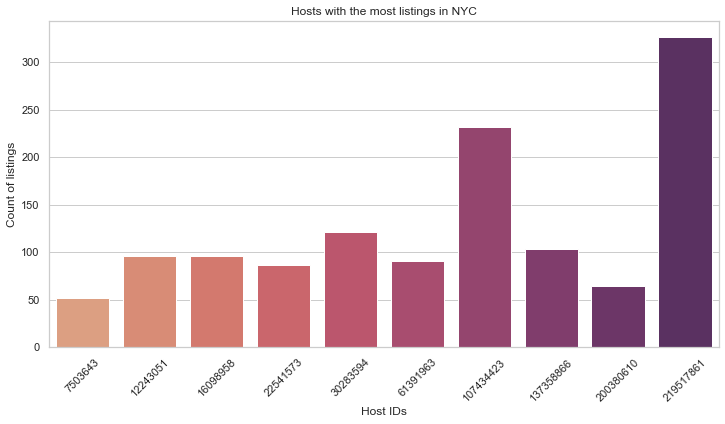

In [37]:
fig_1=sns.barplot(x="Host_ID", y="Listing_Count", data=top_host,
                 palette='flare') # Blues_d
fig_1.set_title('Hosts with the most listings in NYC')
fig_1.set_ylabel('Count of listings')
fig_1.set_xlabel('Host IDs')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)
plt.show()

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.

### Top reviewed listing

* Explaination of the below code 
* First we are finding the top 10 reviews in the dataframe and then displaying only the two columns [host_id] and [number_of_reviews] of the dataframe  df


In [38]:
top_reviewed_listings=df.nlargest(10,'number_of_reviews')[['host_id','number_of_reviews']]
top_reviewed_listings

,host_id,number_of_reviews
11759,47621202,629
2031,4734398,607
2030,4734398,597
2015,4734398,594
13495,47621202,576
10623,37312959,543
1879,2369681,540
20403,26432133,510
4870,12949460,488
471,792159,480


* BELOW we are creating a dataframe  of the two columns and naming it top_host_review
* We also renamed the two columns 
* Inplace=True makes the changes stick else the changes will not be saved

In [39]:
top_host_review = pd.DataFrame(top_reviewed_listings)
top_host_review.rename(columns={'host_id':'Host_ID', 'number_of_reviews':'Review Count'}, inplace=True)
#top_host_review.set_index('Host_ID',inplace=True)
top_host_review

,Host_ID,Review Count
11759,47621202,629
2031,4734398,607
2030,4734398,597
2015,4734398,594
13495,47621202,576
10623,37312959,543
1879,2369681,540
20403,26432133,510
4870,12949460,488
471,792159,480


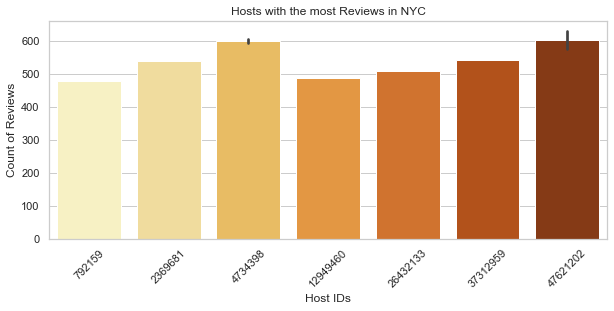

In [40]:
#Changed the figure size and color here which we had already set in the beginning
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style('whitegrid')  #alternate for darkgrid can be 'whitegrid'darkgrid

fig_2=sns.barplot(x="Host_ID", y="Review Count", data=top_host_review, palette='YlOrBr')  # OR palette="Blues_d"

fig_2.set_title('Hosts with the most Reviews in NYC') 
fig_2.set_ylabel('Count of Reviews')
fig_2.set_xlabel('Host IDs')
fig_2.set_xticklabels(fig_2.get_xticklabels(), rotation=45)
plt.show()

### Which neighbourhood has the highest listing

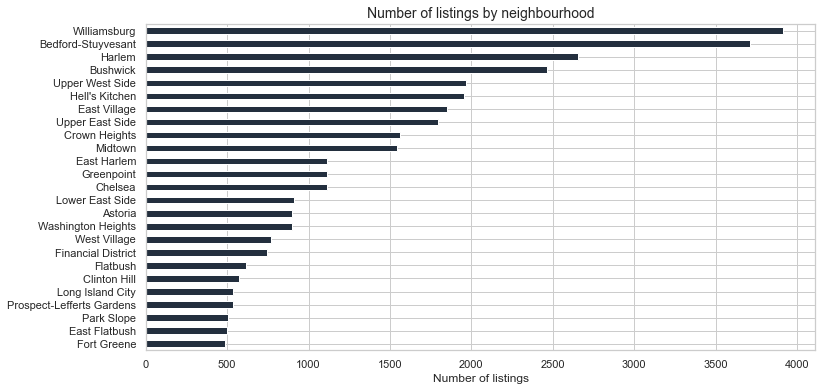

In [41]:
#Amazon website colors 
# The Amazon Website Colors with Hex & RGB Codes has 4 colors which are 
#Mellow Apricot (#FEBD69), Gunmetal (#232F3E), Charcoal (#37475A) and Eerie Black (#131A22).



#Seeing which neighborhood has the highest number of listings
top_n_listings = df['neighbourhood'].value_counts().sort_values(ascending=True)
top_n_listings = top_n_listings[-25:]
top_n_listings.plot.barh(figsize=(12,6), color ='#232F3E', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

###  Type of properties available

In [42]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

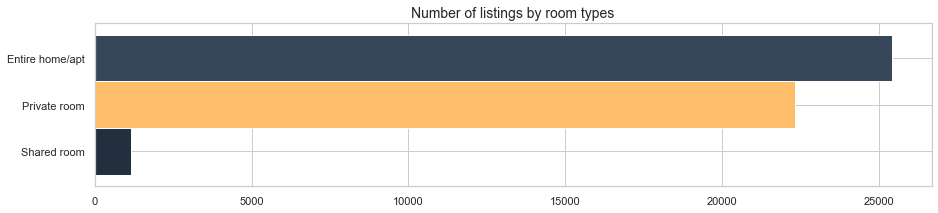

In [43]:
property_type = df['room_type'].value_counts().sort_values(ascending=True)
property_type.plot.barh(figsize =(15,3), width=1, color=['#232F3E','#FEBD69','#37475A'])
                                            #We give four different colours for our graphs
plt.title("Number of listings by room types", fontsize=14)
plt.show()

* Room rentals per day are costlier than a month’s rent, so obviously renting out for a couple of days could help owners earn more.
* Also for hotels, it could be worth it if along with hotel listing they can also list on Airbnb could be an alternate revenue source.
* And few house owners with multiples houses can only rent and this could lead to an acute housing crisis. As people don’t find homes to live in but properties are available on Airbnb.
* More private rooms on Airbnb could mean that people are trying to make extra money, but the entire apartment means either hotel are listed as well or homeowners are not renting it out on but hosting on Airbnb.
* We can see that the entire property’s size is double that of private rooms, this can be further investigated.

## Room types available in the top neighbourhoods.

In [44]:
#as we saw before from unique values for neighbourhood there are way too many to concentrate on.
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them.

#finding out top 10 neighbourhoods 
df.neighbourhood.value_counts().head(10)

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1957
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: neighbourhood, dtype: int64

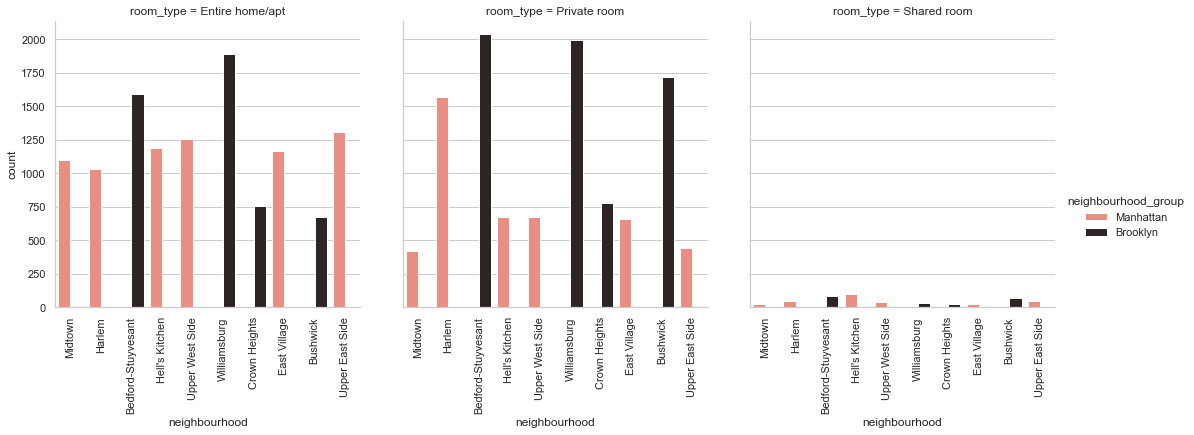

In [45]:
#let's now combine this with our boroughs (neighborhoods) and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
     'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#using catplot to represent multiple interesting attributes together and a count
fig_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, 
                  kind='count',palette= 'dark:salmon_r') 

# x is the first cateory that we are passing 
# to pass the second category we pass in value inside hue 
# basically we are grouping the date based on neighbourhood and neighourhood_group
# the col ='room_type' > we are creating one different column for every single roomtype in the dataset

fig_3.set_xticklabels(rotation=90)
plt.show()

Amazing, but let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 (boroughs) neighborhoods only 2 neighbourhoods (boroughs) are represented: Manhattan and Brooklyn: that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan neighborhood, and Harlem for Brooklyn neighborhood.

## Let's now find the top used words for listing names

In [46]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
all_names = []

#getting name strings from the column and appending it to the list
for name in df.name_:  # remember names column is named name_ in the dataframe
    all_names.append(name)
    
#setting a function that will split those name strings into separate words
def split_name (name):
    spl=str(name).split()
    return spl

#initializing empty list where we are going to have words counted
count_names = []

#getting name string from our list and using split function, later appending to list above
for x in all_names:
    for word in split_name(x):
        word = word.lower()
        count_names.append(word)

In [47]:
#we are going to use counter
from collections import Counter

#let's see top 25 used words by host to name their listing
top_25_words=Counter(count_names).most_common()
top_25_words=top_25_words[0:25]
#top_25_words

In [48]:
#now let's put our findings in dataframe for further visualizations
common_words=pd.DataFrame(top_25_words)
common_words.rename(columns={0:'Words', 1:'Count'}, inplace=True)

In [49]:
common_words

,Words,Count
0,in,16718
1,room,9374
2,bedroom,7226
3,private,6976
4,apartment,6111
5,cozy,4624
6,the,3868
7,to,3826
8,studio,3770
9,brooklyn,3629


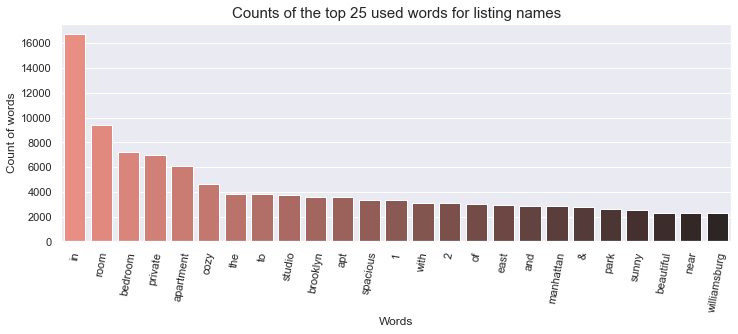

In [50]:
sns.set(rc={'figure.figsize':(12,4)})

fig_3=sns.barplot(x='Words', y='Count', data=common_words,palette="dark:salmon_r")
fig_3.set_title('Counts of the top 25 used words for listing names', fontsize=15)
fig_3.set_ylabel('Count of words')
fig_3.set_xlabel('Words')
fig_3.set_xticklabels(fig_3.get_xticklabels(), rotation=80)
plt.show()

We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such wors are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible

### Conclusion
Summarizing our findings, suggesting other features

* This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 
* First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings. We found that our top host has 327 listings.  

* Next we  found the most reviewed listings.

* We also visualized the top hosts with the maximum number of reviews.

* Further, we came back and found out the neighbourhood with the highest number of listings and also the top properties that are available.

* We saw the room types avaliable in top neighbourhoods with the help of catplot.

* Lastly, we found the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. 